# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [7]:
bias=100
X , y, coef = make_regression(n_features = 1,bias=bias, noise=10, random_state=42, coef=True)

In [8]:
X.shape,y.shape

((100, 1), (100,))

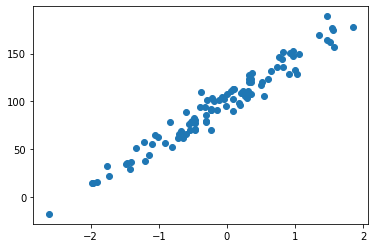

In [9]:
plt.scatter(X,y)

In [12]:
coef, bias # Here I have m and c from sklearn

(array(41.74110031), 100)

In [13]:
y_gen = X * coef + bias

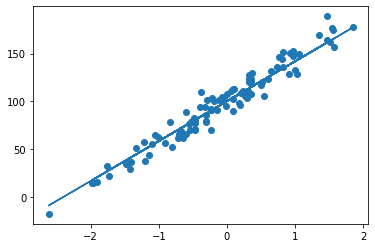

In [14]:
plt.scatter(X,y)
plt.plot(X,y_gen)

In [15]:
# Lets plot a line using Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression()

In [20]:
model.fit(X,y) # figuring out m and c

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.coef_

array([44.43716999])

In [22]:
model.intercept_

101.16511532052698

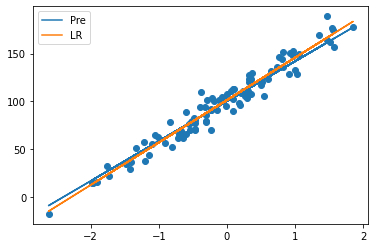

In [25]:
plt.scatter(X,y)
plt.plot(X,y_gen, label='Pre')
plt.plot(X,model.predict(X), label='LR')
plt.legend()

# Custom Linear Regression

In [26]:
class LinearRegCustom:
    
    # constructor
    def __init__(self, lr=0.1):
        self.lr = lr
        
    # training function i.e., fit
    def fit(self, X, y):
        self._X=X                   # _X mock behavior like private
        self._y=y.reshape(-1,1)     # do calculations, else it will will give error due to some numpy shape
        
        # need to figure out value of coef and intercept
        # step 1:pick these values at random
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        # gradient descent
        errors = []
        
        # lets say we do this 50 times
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X) # from predict funtion
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()


In [27]:
model = LinearRegCustom(lr=.1)

In [28]:
errors = model.fit(X, y)

In [29]:
model.coef_, model.intercept_

(43.25756109606691, 100.29624005383961)

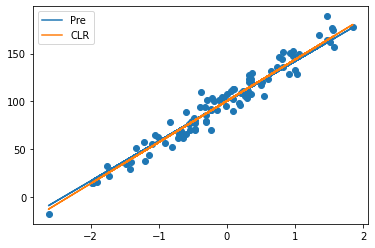

In [30]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

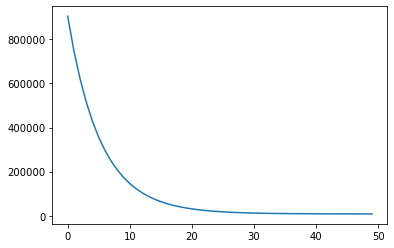

In [31]:
plt.plot(errors)
